In [ ]:
#Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import re
import string

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from time import time


print('Done')

Done


In [ ]:
df = pd.read_csv('/Users/humi.mochi/Downloads/data_final.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,Title,Company,Type,AvgSalary,City,State,Data analyst,Data engineer,Data science,Development
0,Data Science Co-Op- Fall 2022,Sony Music Entertainment US,3,5,New York,NY,0,0,1,0
1,Data Science Co-Op- Fall 2022,American Institutes for Research,1,2,Unknow,UK,0,0,1,0
2,Assistant/Associate Project Scientist - Social...,Certilytics,1,3,United States,UK,0,0,1,0
3,Assistant/Associate Project Scientist - Social...,Instec Corp,3,3,Unknow,UK,0,0,1,0
4,Assistant/Associate Project Scientist - Social...,SunPower,3,2,Unknow,UK,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1483,Requirements Engineer- Data Induction,Blue Cross of Idaho,1,3,Meridian,ID,0,1,0,0
1484,Requirements Engineer- Data Induction,"Goken America, LLC",1,3,Ann Arbor,MI,0,1,0,0
1485,Requirements Engineer- Data Induction,Wellframe,3,4,Boston,MA,0,1,0,0
1486,Requirements Engineer- Data Induction,Solidigm,1,2,Folsom,CA,0,1,0,0


In [ ]:
class TextSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on text columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [ ]:
# Define features & target, also perform train_test split

features= [c for c in df.columns.values if c not in ['AvgSalary']]
numeric_features= [c for c in df.columns.values if c not in ['Title','Company','City','State']]
target = 'AvgSalary'

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
X_train.head()

,Title,Company,Type,City,State,Data analyst,Data engineer,Data science,Development
1250,VIE - Data Visualization Engineer - H/F,Nuvento systems,1,Unknow,UK,0,1,0,0
979,Data Analyst,Crunch.io,3,San Francisco Bay Area,CA,1,0,0,0
940,Senior Data Analyst,Ritual,1,Unknow,UK,1,0,0,0
411,Junior/Middle .NET Developer,BRS,3,Atlanta,GA,0,0,0,1
631,Data Analyst,Coordinated Care Services Inc,1,Rochester,NY,1,0,0,0


In [ ]:
# Define text feature pipelines

Title = Pipeline([
                ('selector', TextSelector(key='Title')),
                ('tfidf', TfidfVectorizer(stop_words='english'))
            ])

Company = Pipeline([
                ('selector', TextSelector(key='Company')),
                ('tfidf', TfidfVectorizer(stop_words='english'))
            ])

City = Pipeline([
                ('selector', TextSelector(key='City')),
                ('tfidf', TfidfVectorizer(stop_words='english'))
            ])

State = Pipeline([
                ('selector', TextSelector(key='State')),
                ('tfidf', TfidfVectorizer(stop_words='english'))
            ])

Title.fit_transform(X_train)

<1190x266 sparse matrix of type '<class 'numpy.float64'>'
	with 4216 stored elements in Compressed Sparse Row format>

In [ ]:
# Define numeric feature pipelines 

Type =  Pipeline([
                ('selector', NumberSelector(key='Type')),
                ('standard', StandardScaler())
    
            ])
Data_Analyst =  Pipeline([
                ('selector', NumberSelector(key='Data analyst')),
                ('standard', StandardScaler())
            ])
Data_Engineer =  Pipeline([
                ('selector', NumberSelector(key='Data engineer')),
                ('standard', StandardScaler()),
            ])
Data_Science =  Pipeline([
                ('selector', NumberSelector(key='Data science')),
                ('standard', StandardScaler()),
            ])
Development =  Pipeline([
                ('selector', NumberSelector(key='Development')),
                ('standard', StandardScaler()),
            ])

In [ ]:
feats = FeatureUnion([('Title', Title), 
                      ('Company', Company),
                      ('Type', Type),
                      ('City', City),
                      ('State', State),
                      ('Data analyst', Data_Analyst),
                      ('Data engineer', Data_Engineer),
                      ('Data science', Data_Science),
                      ('Development', Development)
                     ])

feature_processing = Pipeline([('feats', feats)])
feature_processing.fit_transform(X_train)

<1190x1645 sparse matrix of type '<class 'numpy.float64'>'
	with 15284 stored elements in Compressed Sparse Row format>

In [ ]:
#Use pipeline 

rf =  Pipeline([('features',feats),
              ('Random Forest', RandomForestClassifier(n_estimators=100))
               ])

svm = Pipeline([('features',feats),
              ('Support Vector Machine', SVC(kernel='rbf', C=0.5))
               ])
                
lr = Pipeline([('features',feats),
              ('Linear Regression', LinearRegression(n_jobs=3))
              ])

In [ ]:
models = [('Random Forest', rf),
          ('Support Vector Machine', svm),
          ('Linear Regression', lr)]

In [ ]:
scores = [(name, cross_val_score(model, X_train, y_train, cv=2).mean()) for name, model, in models]
scores

[('Random Forest', 0.5),
 ('Support Vector Machine', 0.45546218487394957),
 ('Linear Regression', -0.6350663935516364)]

In [ ]:
rf =  Pipeline([('features',feats),
              ('Random Forest', RandomForestClassifier(n_estimators=100, criterion='entropy', min_samples_leaf=3, verbose=True))
               ])
rf.fit(X_train, y_train)

preds = rf.predict(X_test)
preds

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([3, 2, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 2, 1, 1, 2, 3, 3, 2, 3, 3,
       3, 2, 2, 2, 1, 1, 2, 2, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3,
       2, 1, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 3,
       3, 1, 3, 2, 1, 1, 1, 1, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 1, 1, 1, 2,
       1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3,
       3, 1, 3, 3, 3, 1, 1, 2, 1, 2, 2, 3, 3, 3, 1, 2, 3, 3, 3, 3, 3, 1,
       3, 1, 3, 2, 3, 3, 2, 1, 3, 3, 3, 3, 2, 2, 1, 1, 2, 1, 3, 1, 3, 3,
       2, 1, 2, 3, 3, 2, 3, 3, 2, 2, 1, 2, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 1, 1, 2, 4, 2, 3, 2, 3, 2, 2, 3, 1, 3, 1, 3, 3, 3, 1, 3,
       2, 2, 3, 3, 3, 1, 1, 3, 1, 1, 2, 3, 2, 3, 3, 1, 3, 3, 3, 3, 2, 1,
       3, 3, 2, 2, 4, 3, 1, 2, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 2, 3, 2,
       4, 3, 2, 1, 3, 4, 3, 3, 1, 1, 1, 3, 1, 1, 2, 3, 1, 3, 3, 1, 1, 1,
       3, 1, 2, 3, 3, 2, 3, 1, 2, 3, 3, 2, 1, 3, 1, 3, 3, 4, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3])

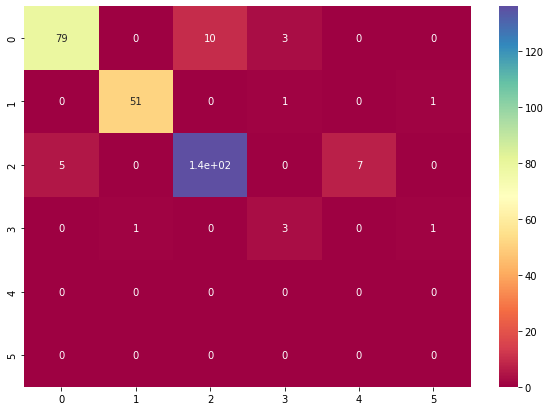

In [ ]:
# A potential useful way to visualize the model results

def matrix_plot(preds, y_test, variation): 

    confusion_matrix = np.zeros((6,6))

    for i,j in zip(preds,y_test):
    
            if abs(i-j) <= variation:
                confusion_matrix[i-1,i-1]+=1
            else: 
                confusion_matrix[i-1,j-1]+=1

    df_cm = confusion_matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(df_cm, annot=True, cmap="Spectral") 
    plt.show()
    
matrix_plot(list(preds), list(y_test), 1)

In [ ]:
perc = np.abs((preds - y_test)/y_test)
perc = perc.values*100

In [ ]:
data = {'Salary_Pred':preds,
        'Salary_Fact':y_test,
       '% Deviation': perc}

A = pd.DataFrame(data)
A.head(10)

,Salary_Pred,Salary_Fact,% Deviation
1318,3,2,50.000000
899,2,1,100.000000
439,1,1,0.000000
560,1,2,50.000000
433,1,3,66.666667
1164,3,3,0.000000
49,1,2,50.000000
1455,3,2,50.000000
482,1,0,inf
1148,3,3,0.000000
